In [1]:
import pandas as pd
import xml.etree.ElementTree as ET  # For parsing the XML files
from xml.dom import minidom  # For prettifying the XML files
import os
import shutil  # For copying files

# Update the data path
data_path = r"C:\Users\atray\Desktop\Ml project\Thyroid Dataset"

# Collect all XML and JPG file paths
paths = []
for dirname, _, filenames in os.walk(data_path):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))

# Split all paths by extension
xmls = []
jpgs = []
for path in paths:
    if path.endswith(".xml"):
        xmls.append(path)
    elif path.endswith(".jpg"):
        jpgs.append(path)

print(f"{len(xmls)} XMLs + {len(jpgs)} JPGs = {len(paths)} paths")

# Create directories for images and masks
os.makedirs(os.path.join(data_path, "images"), exist_ok=True)  # Will contain only the images
os.makedirs(os.path.join(data_path, "masks"), exist_ok=True)  # Will contain the masks for each image

# Example: Copy images to the newly created directory
for jpg in jpgs:
    shutil.copy(jpg, os.path.join(data_path, "images", os.path.basename(jpg)))


390 XMLs + 480 JPGs = 870 paths


In [2]:
#Print an XML file
tree = ET.parse(xmls[4])
rough_string = ET.tostring(tree.getroot(), 'utf8')
reparsed = minidom.parseString(rough_string)
print(reparsed.toprettyxml(indent="  ").replace("&quot;", '"'))

<?xml version="1.0" ?>
<case>
  <number>102</number>
  <age>28</age>
  <sex>F</sex>
  <composition>solid</composition>
  <echogenicity>isoechogenicity</echogenicity>
  <margins>well defined</margins>
  <calcifications>microcalcifications</calcifications>
  <tirads>4b</tirads>
  <reportbacaf/>
  <reporteco/>
  <mark>
    <image>1</image>
    <svg>[{"points": [{"x": 219, "y": 73}, {"x": 217, "y": 68}, {"x": 209, "y": 64}, {"x": 206, "y": 63}, {"x": 198, "y": 57}, {"x": 194, "y": 56}, {"x": 189, "y": 56}, {"x": 174, "y": 56}, {"x": 170, "y": 56}, {"x": 154, "y": 55}, {"x": 149, "y": 53}, {"x": 140, "y": 53}, {"x": 134, "y": 53}, {"x": 128, "y": 53}, {"x": 119, "y": 55}, {"x": 113, "y": 60}, {"x": 101, "y": 73}, {"x": 98, "y": 79}, {"x": 98, "y": 84}, {"x": 104, "y": 99}, {"x": 108, "y": 104}, {"x": 118, "y": 110}, {"x": 129, "y": 113}, {"x": 135, "y": 119}, {"x": 139, "y": 122}, {"x": 144, "y": 126}, {"x": 151, "y": 128}, {"x": 172, "y": 129}, {"x": 180, "y": 126}, {"x": 186, "y": 123}, {

In [31]:
# Create a dictionary for the data so that we can make it a pd.DataFrame
csv_save_path = r"C:\Users\atray\Desktop\Ml project\csvdata.csv"

data = {
    "Number": [],
    "Age": [],
    "Sex": [],
    "Composition": [],
    "Echogenicity": [],
    "Margins": [],
    "Calcifications": [],
    "Tirads": [],
    "Reportbacaf": [],
    "Reporteco": [],
}
svg_strings = {}  # To hold the SVG of each image of every case

# Parse every xml file and add the data to the dictionary
for xml in xmls:
    tree = ET.parse(xml)
    root = tree.getroot()
    case_number = int(root.find("number").text)
    data["Number"].append(case_number)
    if root.find("age").text:
        data["Age"].append(int(root.find("age").text))
    else:
        data["Age"].append(root.find("age").text)
    data["Sex"].append(root.find("sex").text)
    data["Composition"].append(root.find("composition").text)
    data["Echogenicity"].append(root.find("echogenicity").text)
    data["Margins"].append(root.find("margins").text)
    data["Calcifications"].append(root.find("calcifications").text)
    data["Tirads"].append(root.find("tirads").text)
    data["Reportbacaf"].append(root.find("reportbacaf").text)
    data["Reporteco"].append(root.find("reporteco").text)
    
    # Get SVGs. Key: <{case number}_{image index}> which is the same as the respective image filename
    for mark in root.findall("mark"):
        image_idx = mark.find("image").text
        svg_strings[f"{case_number}_{image_idx}"] = mark.find("svg").text

df = pd.DataFrame(data)
df.sort_values(by="Number", inplace=True)
df.set_index("Number", inplace=True)

df.to_csv(csv_save_path)
print(f"Data saved to {csv_save_path}")

df.head()

Data saved to C:\Users\atray\Desktop\Ml project\csvdata.csv


,Age,Sex,Composition,Echogenicity,Margins,Calcifications,Tirads,Reportbacaf,Reporteco
Number,,,,,,,,,
1,NaN,None,None,None,None,None,None,None,None
2,49.0,F,solid,hyperechogenicity,well defined,non,2,None,None
3,31.0,F,spongiform,isoechogenicity,well defined,microcalcifications,4a,None,None
4,37.0,F,spongiform,isoechogenicity,well defined,microcalcifications,4a,None,None
5,47.0,F,solid,hypoechogenicity,ill defined,microcalcifications,5,None,None


In [4]:
# See how many values are reported for each attribute
# We can see that "Reportbacaf" is empty, so we can safely remove it
df.count()

Age               304
Sex               305
Composition       200
Echogenicity      200
Margins           297
Calcifications    299
Tirads            298
Reportbacaf         0
Reporteco          21
dtype: int64

In [5]:
df.drop(columns=["Reportbacaf"], inplace=True)

In [6]:
from PIL import Image, ImageDraw

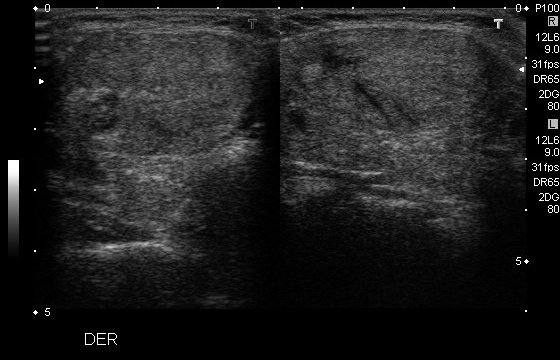

In [7]:
# Show the an image
Image.open(jpgs[0])

In [8]:
# Find all the different image dimensions; we can see that they all share the same
unique_dims = []
for jpg in jpgs:
    dims = Image.open(jpg).size
    if dims not in unique_dims:
        unique_dims.append(dims)

print(unique_dims)

[(560, 360)]


In [9]:
image_size = unique_dims[0]

# Show the first key and value of the svg dictionary we created
list(svg_strings.items())[0]

('1_1',
 '[{"points": [{"x": 385, "y": 182}, {"x": 398, "y": 179}, {"x": 404, "y": 176}, {"x": 409, "y": 173}, {"x": 415, "y": 159}, {"x": 417, "y": 153}, {"x": 421, "y": 143}, {"x": 421, "y": 136}, {"x": 419, "y": 76}, {"x": 412, "y": 73}, {"x": 406, "y": 69}, {"x": 393, "y": 61}, {"x": 390, "y": 57}, {"x": 383, "y": 53}, {"x": 378, "y": 50}, {"x": 369, "y": 44}, {"x": 360, "y": 42}, {"x": 352, "y": 42}, {"x": 348, "y": 42}, {"x": 340, "y": 41}, {"x": 331, "y": 40}, {"x": 321, "y": 40}, {"x": 311, "y": 39}, {"x": 304, "y": 39}, {"x": 294, "y": 42}, {"x": 270, "y": 43}, {"x": 264, "y": 42}, {"x": 253, "y": 41}, {"x": 242, "y": 39}, {"x": 231, "y": 37}, {"x": 221, "y": 36}, {"x": 209, "y": 35}, {"x": 190, "y": 39}, {"x": 164, "y": 49}, {"x": 158, "y": 51}, {"x": 146, "y": 69}, {"x": 137, "y": 80}, {"x": 133, "y": 89}, {"x": 136, "y": 236}, {"x": 142, "y": 244}, {"x": 149, "y": 251}, {"x": 161, "y": 261}, {"x": 210, "y": 271}, {"x": 217, "y": 274}, {"x": 223, "y": 279}, {"x": 228, "y": 2

In [19]:
# Assuming svg_strings is defined and image_size is set
no_mask = 0  # to count how many SVGs are empty
with_syntax_error = 0  # to count how many XMLs are not complete
images_to_remove = []  # List to track images to remove

# Create masks based on SVG strings
for svg_name, svg_str in svg_strings.items():
    img = Image.new("1", image_size)  # Create a new black/white image
    draw = ImageDraw.Draw(img)
    
    if svg_str is None:
        no_mask += 1
        images_to_remove.append(svg_name)  # Track image to remove
        continue
    
    try:
        # Safely evaluate the SVG string to a list
        svg_content = eval(svg_str)
    except SyntaxError:
        with_syntax_error += 1
        images_to_remove.append(svg_name)  # Track image to remove
        continue
    
    for area in svg_content:
        points = [(point["x"], point["y"]) for point in area["points"]]
        draw.polygon(points, fill='white')
    
    # Save the mask image
    mask_path = f"C:/Users/atray/Desktop/Ml project/Thyroid Dataset/masks/{svg_name}.jpg"
    img.save(mask_path)
    
    # Copy the corresponding image file only if it doesn't already exist
    source_image_path = f"C:/Users/atray/Desktop/Ml project/Thyroid Dataset/images/{svg_name}.jpg"
    
    # Check if the source image exists before copying
    if not os.path.exists(source_image_path):
        print(f"Warning: Source image does not exist: {source_image_path}")
    else:
        # Define the destination path
        destination_image_path = f"C:/Users/atray/Desktop/Ml project/Thyroid Dataset/images/{svg_name}.jpg"
        
        # Only copy if the source and destination are not the same
        if source_image_path != destination_image_path:
            shutil.copyfile(source_image_path, destination_image_path)

# Remove images corresponding to empty SVGs or invalid XMLs
for svg_name in images_to_remove:
    image_path = f"C:/Users/atray/Desktop/Ml project/Thyroid Dataset/images/{svg_name}.jpg"
    print(f"Checking if image exists for removal: {image_path}")  # Debug statement
    if os.path.exists(image_path):
        os.remove(image_path)  # Remove the image
        print(f"Removed image: {image_path}")
    else:
        print(f"Image not found, cannot remove: {image_path}")  # Debug statement

print(f"Total empty SVGs: {no_mask}, Total syntax errors: {with_syntax_error}")

Checking if image exists for removal: C:/Users/atray/Desktop/Ml project/Thyroid Dataset/images/120_1.jpg
Removed image: C:/Users/atray/Desktop/Ml project/Thyroid Dataset/images/120_1.jpg
Checking if image exists for removal: C:/Users/atray/Desktop/Ml project/Thyroid Dataset/images/127_1.jpg
Removed image: C:/Users/atray/Desktop/Ml project/Thyroid Dataset/images/127_1.jpg
Checking if image exists for removal: C:/Users/atray/Desktop/Ml project/Thyroid Dataset/images/142_2.jpg
Removed image: C:/Users/atray/Desktop/Ml project/Thyroid Dataset/images/142_2.jpg
Checking if image exists for removal: C:/Users/atray/Desktop/Ml project/Thyroid Dataset/images/165_1.jpg
Removed image: C:/Users/atray/Desktop/Ml project/Thyroid Dataset/images/165_1.jpg
Checking if image exists for removal: C:/Users/atray/Desktop/Ml project/Thyroid Dataset/images/166_1.jpg
Removed image: C:/Users/atray/Desktop/Ml project/Thyroid Dataset/images/166_1.jpg
Checking if image exists for removal: C:/Users/atray/Desktop/Ml p

In [11]:
# We do not store images of either of the categories below
print(f"{no_mask} SVGs were empty")
print(f"{with_syntax_error} XMLs were not complete")

6 SVGs were empty
8 XMLs were not complete


In [ ]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# Specify the directory containing images
image_dir = "C:/Users/atray/Desktop/Ml project/Thyroid Dataset/images/"
mask_dir = "C:/Users/atray/Desktop/Ml project/Thyroid Dataset/masks/"

# List all JPG files in the images directory
all_images = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.jpeg'))]

# Check if there are images in the directory
if not all_images:
    print("No images found in the specified directory.")
else:
    # Randomly select an image
    random_image_name = random.choice(all_images).replace('.jpg', '')  # Remove extension for mask name

    # Load the original image and its mask
    img_path = os.path.join(image_dir, f"{random_image_name}.jpg")
    mask_path = os.path.join(mask_dir, f"{random_image_name}.jpg")

    # Open the images
    img = Image.open(img_path)
    mask = Image.open(mask_path)

    # Create a new image to show both side by side
    both = Image.new('RGB', (img.width + mask.width, max(img.height, mask.height)))
    both.paste(img, (0, 0))  # Paste the original image on the left
    both.paste(mask.convert('RGB'), (img.width, 0))  # Paste the mask on the right, converting to RGB

    # Display the combined image
    plt.figure(figsize=(10, 5))
    plt.imshow(both)
    plt.axis('off')  # Turn off axis numbers and ticks
    plt.title(f"Image and Mask for: {random_image_name}.jpg")  # Display the name of the image
    plt.show()



In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

df.head()

,Age,Sex,Composition,Echogenicity,Margins,Calcifications,Tirads,Reporteco
Number,,,,,,,,
1,NaN,None,None,None,None,None,None,None
2,49.0,F,solid,hyperechogenicity,well defined,non,2,None
3,31.0,F,spongiform,isoechogenicity,well defined,microcalcifications,4a,None
4,37.0,F,spongiform,isoechogenicity,well defined,microcalcifications,4a,None
5,47.0,F,solid,hypoechogenicity,ill defined,microcalcifications,5,None


Text(0, 0.5, '')

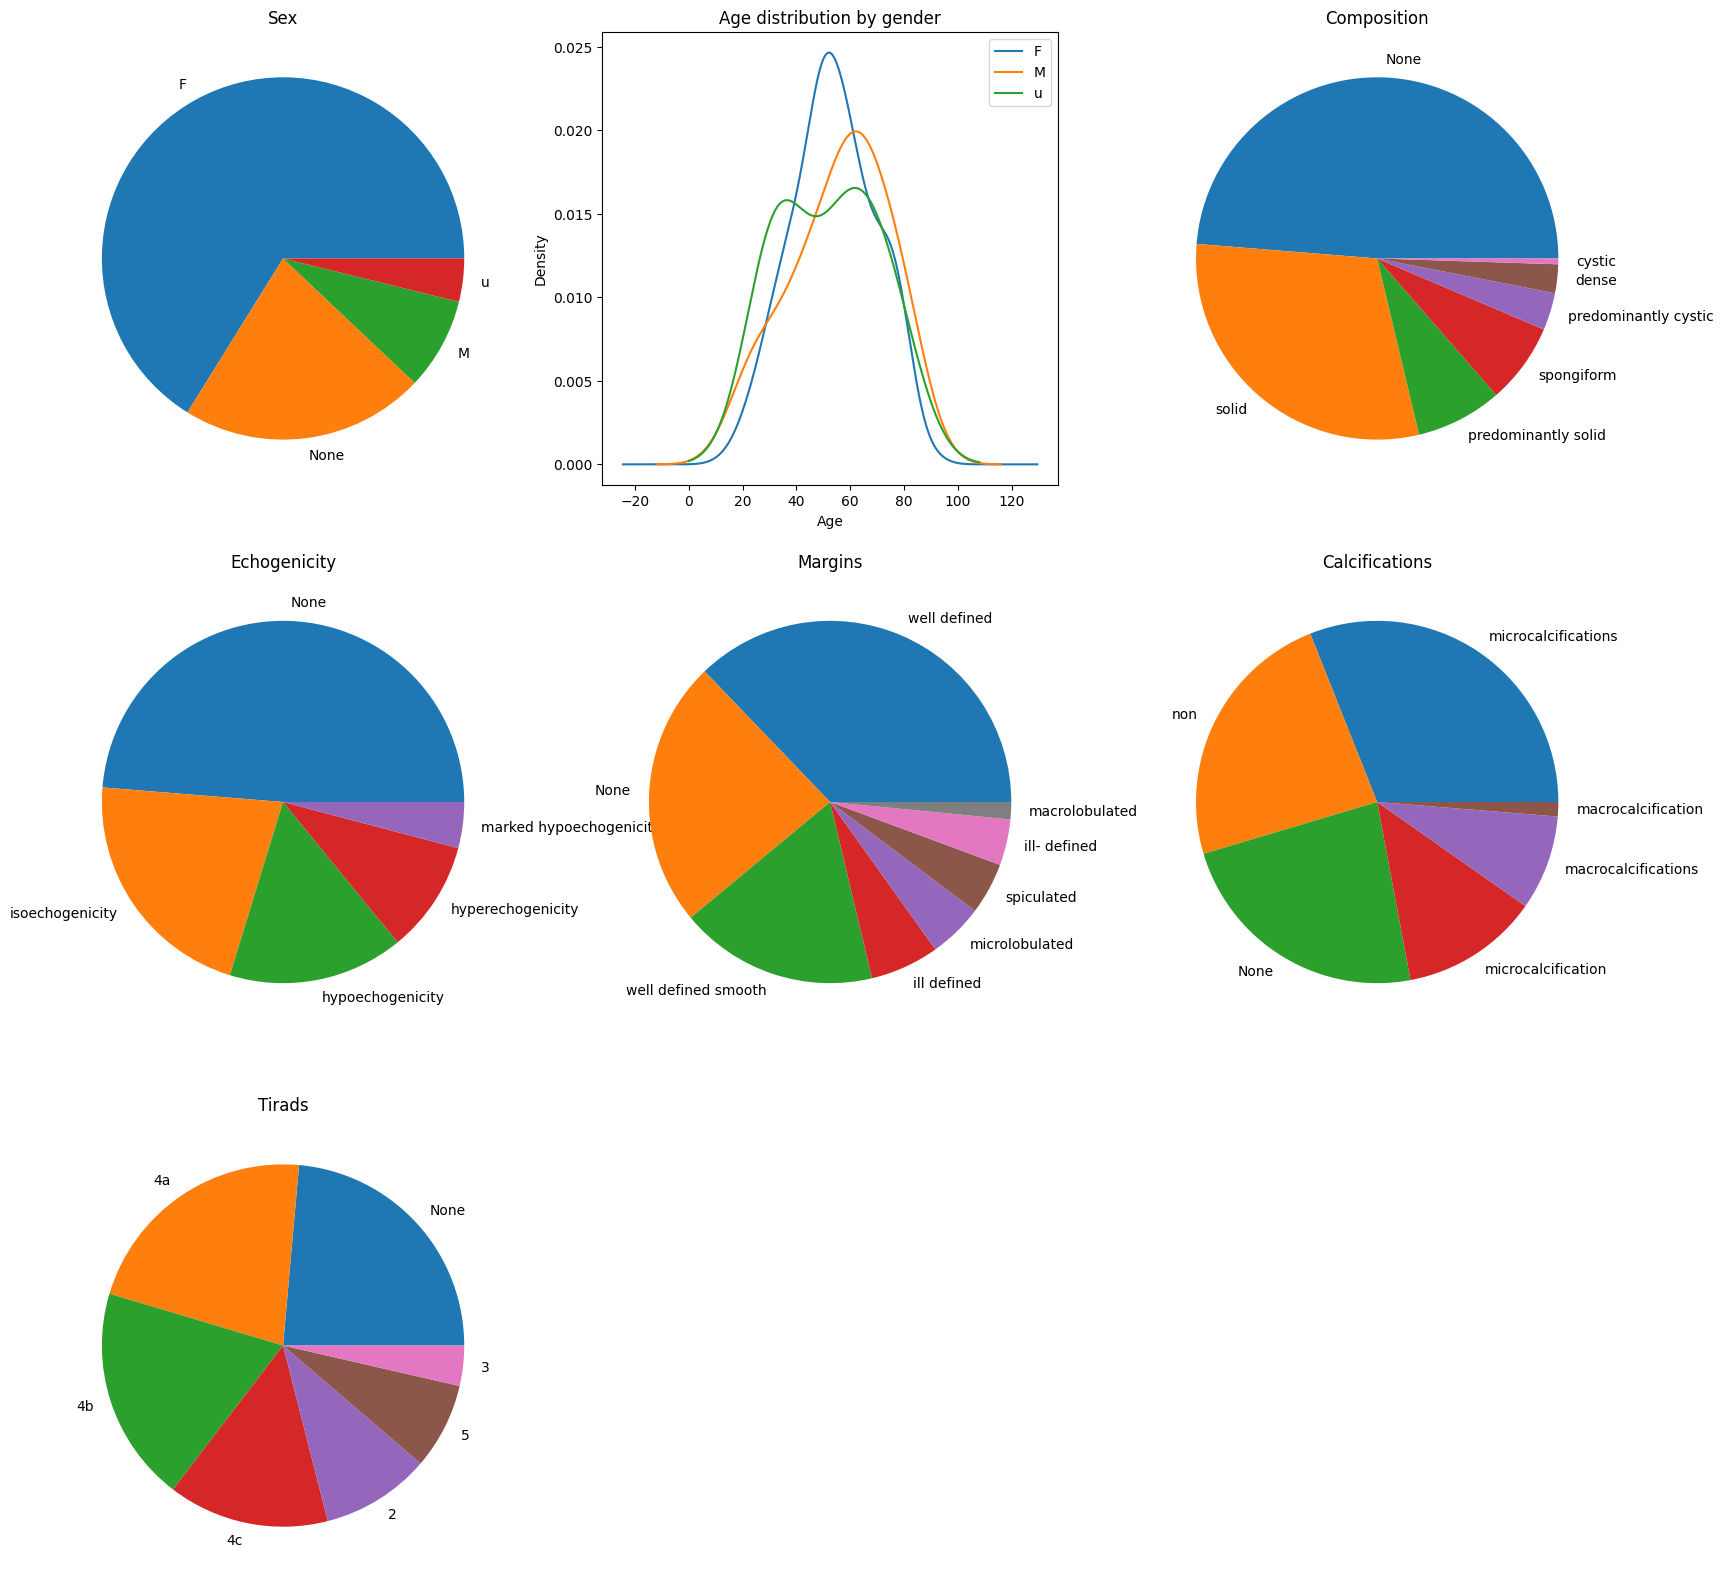

In [23]:
fig = plt.figure(figsize=(20, 20))

plt.subplot(3, 3, 1)
plt.title("Sex")
sex = df["Sex"]
sex = sex.fillna("None")
sex.value_counts().plot(kind="pie")
plt.ylabel("")

plt.subplot(3, 3, 2)
plt.title("Age distribution by gender")
df.groupby("Sex")["Age"].plot(kind="kde", legend=True)
plt.xlabel("Age")

plt.subplot(3, 3, 3)
plt.title("Composition")
comp = df["Composition"]
comp = comp.fillna("None")
comp.value_counts().plot(kind="pie")
plt.ylabel("")

plt.subplot(3, 3, 4)
plt.title("Echogenicity")
echo = df["Echogenicity"]
echo = echo.fillna("None")
echo.value_counts().plot(kind="pie")
plt.ylabel("")


plt.subplot(3, 3, 5)
plt.title("Margins")
margins = df["Margins"]
margins = margins.fillna("None")
margins.value_counts().plot(kind="pie")
plt.ylabel("")

plt.subplot(3, 3, 6)
plt.title("Calcifications")
calc = df["Calcifications"]
calc = calc.fillna("None")
calc.value_counts().plot(kind="pie")
plt.ylabel("")

plt.subplot(3, 3, 7)
plt.title("Tirads")
tirads = df["Tirads"]
tirads = tirads.fillna("None")
tirads.value_counts().plot(kind="pie")
plt.ylabel("")

In [24]:
df["Reporteco"].value_counts()

Reporteco
Nodule 1                                                                                                                                                                                             2
ARROW: TRACHEA                                                                                                                                                                                       2
Thyroiditis + T5                                                                                                                                                                                     1
MULTIPLE PSEUDONODULES                                                                                                                                                                               1
THYROIDITIS                                                                                                                                                                                       

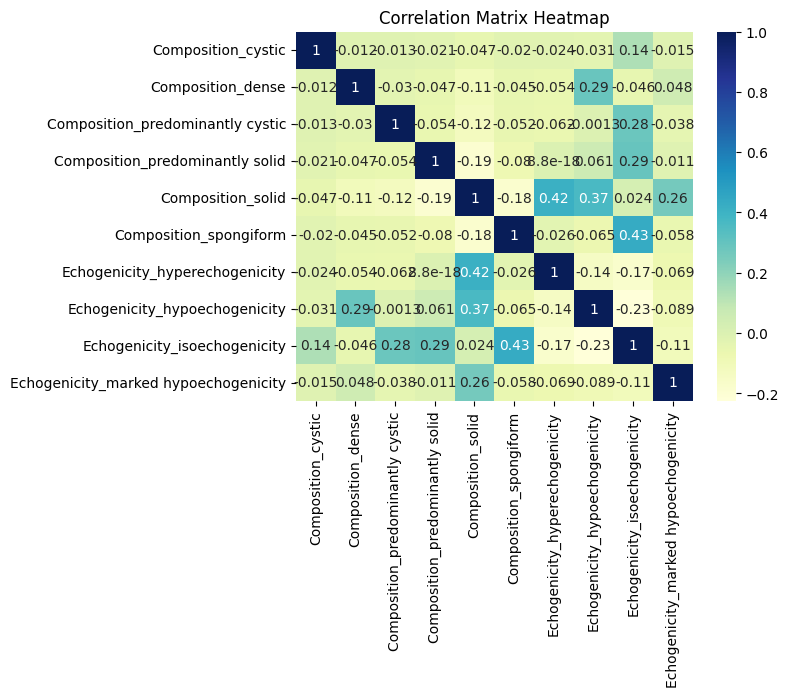

In [25]:
# Indicative Correlation Matrix between Composition and Echogenicity
encoded_df = pd.get_dummies(df[["Composition", "Echogenicity"]])
corr = encoded_df.corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.title("Correlation Matrix Heatmap")
plt.show()
